## Deelvraag 3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import seaborn as sns

In [66]:
def clean(indicator):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(indicator))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
            
    return name

In [67]:
# make a dataframe from the indicator of gender equality rate
CPIA_all = clean("IQ.CPA.GNDR.XQ")

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [68]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")

# proberen lege cellen te vullen
#GDP_all['value'].fillna(method='bfill')

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

In [72]:
def fillna(name):
    for i in name.country.unique():
        name.loc[name['country'] == i]  = name.loc[(name['country'] == i)].fillna(method='ffill')
    return name

In [77]:
GDP_all = fillna(GDP_all)

In [74]:
GDP_all.apply(lambda x: x.count(), axis=0)

country         15312
date            15312
decimal         15312
indicator       15312
value           14721
country_code    15312
dtype: int64

## Correlation between GDP and gender equality rate

In [75]:
# Hiermee krijg je de correlatie tussen de variabelen
#CPIA_all['value'].corr(GDP_all['value'])

# Proberen te plotten
# dit werkt, maar dan plot je de hele dataframe:
#plt.matshow(GDP_CPIA_all.corr())

#dit werkt niet:
#plt.matshow(GDP_CPIA_all["value_x"].corr(GDP_CPIA_all["value_y"], method="pearson"))


# Dit is een functie van internet
#def plot_corr(df,size=10):
#     '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

#     Input:
#         df: pandas DataFrame
#         size: vertical and horizontal size of the plot'''

# corr = GDP_CPIA_all.corr()
# fig, ax = plt.subplots(figsize=(30, 10))
# ax.matshow(corr)
# plt.xticks(range(len(corr.columns)), corr.columns);
# plt.yticks(range(len(corr.columns)), corr.columns);
 
    
# Geen idee wat hier nou eigenlijk gebeurd    
#plt.scatter(CPIA_all['value'],GDP_all['value'])
#plt.plot(np.unique(GDP_CPIA_all['value_CPIA']), np.poly1d(np.polyfit(GDP_CPIA_all['value_CPIA'], GDP_CPIA_all['value_GDP'], 1))(np.unique(GDP_CPIA_all['value_CPIA'])))

def makeScatter(x, y, title ='', xlabel = '', ylabel = ''):
    plt.figure(figsize=(20,10))
    
    #plot the scatter with line
    sns.regplot(x,y, color = 'orchid')
    
    #labels
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    plt.title(title, fontsize = 25)
    plt.xticks(rotation = 65, fontsize = 15)
    plt.yticks(fontsize = 15)

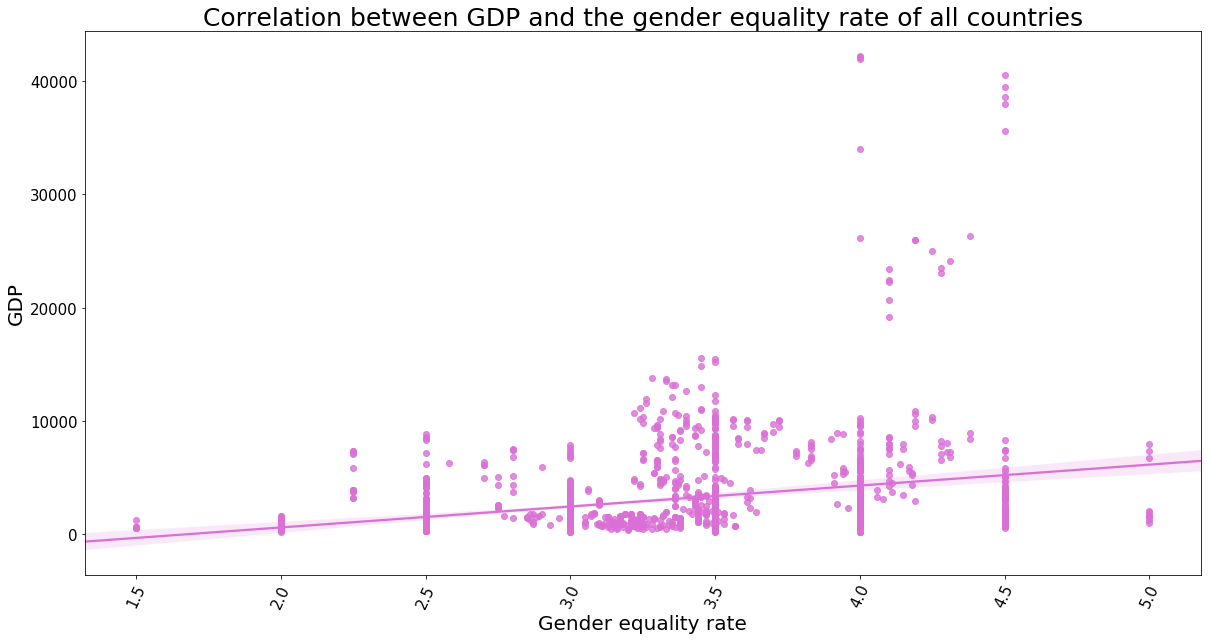

In [76]:
makeScatter(CPIA_all['value'],GDP_all['value'], "Correlation between GDP and the gender equality rate of all countries",
            'Gender equality rate', "GDP")

#### Missing values bij 2017, dus misschien dat laatst bekende data pakken. Desnoods is dat van 2016. Dat kan dan in de tekst verwerkt worden. Of nog ergens een dataset vandaan halen

In [33]:
# Make a dataframe which contains the most recent values of GDP of every country

GDP_now = GDP_all.sort_values("date", ascending = False).drop_duplicates(["country"])

# Make a new dataframe of the 15 countries with the worst equality rating in combination with the GDP data
GDP_worst15 = pd.merge( CPIA_worst15, GDP_now, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])

# missing data!

In [34]:
# A function to create a bar plot

def makeBarPlot(dataframe, title_graph = "", xlabel = "", ylabel = ""):
    #make array from the columns of the dataframe
    array1 = dataframe.country.values
    array2 = dataframe.value_y.values
    
    # colors for the bars
    colors = ["Red", "Blue", "Yellow", "Green", "Pink", "Cyan"]
    
    # set the cells that contain missing values at zero
    array2[np.isnan(array2)] = 0
    
    # plot the bar
    plt.figure(figsize=(30,10))
    plt.bar(array1, array2, color = colors, width = 0.8, align='center')

    plt.xticks(np.arange( len(array1) ), array1, rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)
    
    # labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)
    
    # Get the value of the bar on top of the bar
    for (i, value) in enumerate (array2):
        plt.text(i- 0.4 , value + 2, "%.2f" % (value) , fontsize = 20)
        
    return


    
    

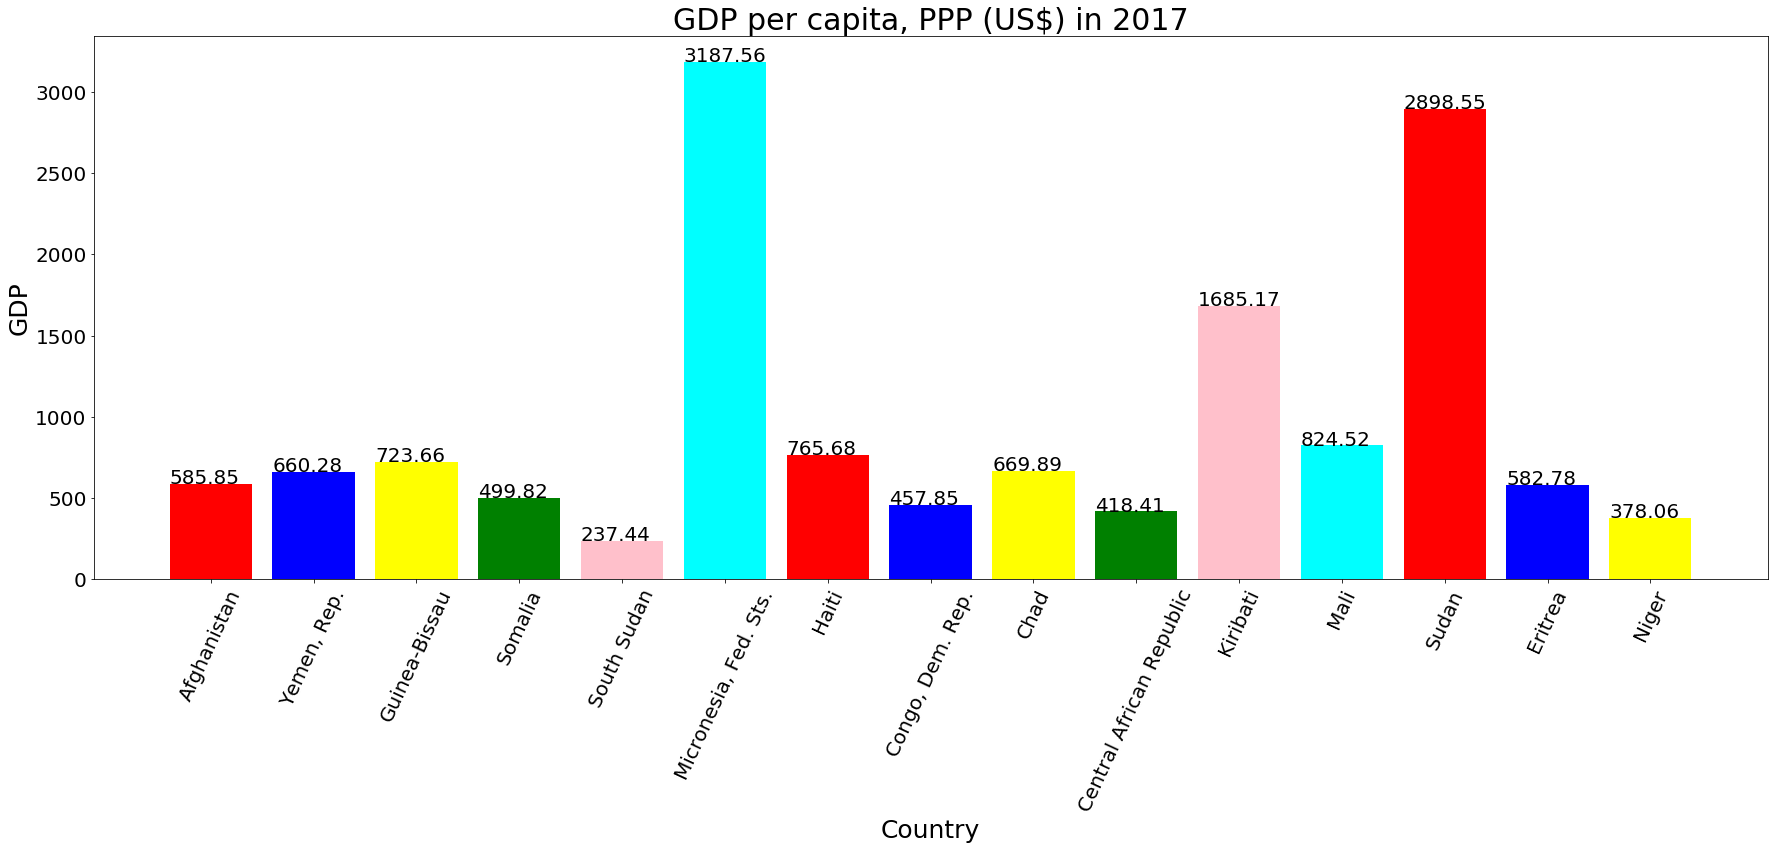

In [35]:
# Plot the GDP of the 15 worst countries

makeBarPlot(GDP_worst15, "GDP per capita, PPP (US$) in 2017", "Country", "GDP")


In [ ]:
# a function to create a data frame of the 15 countries over the years 2007 till 2017

def getYears15(name):
    name.date = name.date.astype(int)
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years.loc[(years.country.isin(CPIA_worst15.country)),:]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    
    return years_worst_sorted
    

In [ ]:
# Create the dataframe of the GDP of the 15 countries over the years 2007 till 2017

GDP_years = getYears15(GDP_all)

In [ ]:
# A function to create a graph

def graph(dataframe, title_graph = "", x_label= "", y_label = ""):
    # visualiseren van verandering per land

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #tekst op x en y-as
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)
    
    return

In [ ]:
# Make a graph of the change in GDP over the years of the 15 countries

graph(GDP_years, "Change in GDP per capita (US$)", "Year", "GDP")

# test

In [ ]:
def clean2(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    
    CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
    CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
    
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years[years.country.isin(list(CPIA_worst15.country))]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    for i in years_worst_sorted.country.unique():
        years_worst_sorted.loc[years_worst_sorted['country'] == i]  = years_worst_sorted.loc[(years_worst_sorted['country'] == i)].ffill().bfill()
    return years_worst_sorted

In [ ]:
test = clean2(("NY.GDP.PCAP.CD"))
test["date"] = test["date"].astype(str)
test_now = test.sort_values("date", ascending = False).drop_duplicates(["country"])
test_now